# Illustration of affine transform of a coordinate grid

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.5000,  0.5000,  0.5000,  0.5000,  0.5000],
        [ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000]])
tensor([[-1.0000, -0.5000,  0.0000,  0.5000,  1.0000],
        [-1.0000, -0.5000,  0.0000,  0.5000,  1.0000],
        [-1.0000, -0.5000,  0.0000,  0.5000,  1.0000],
        [-1.0000, -0.5000,  0.0000,  0.5000,  1.0000],
        [-1.0000, -0.5000,  0.0000,  0.5000,  1.0000]])
torch.Size([25, 3])
torch.Size([2, 3])
torch.Size([25, 2])


/home/nlang/miniforge3/envs/supernf/lib/python3.10/site-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


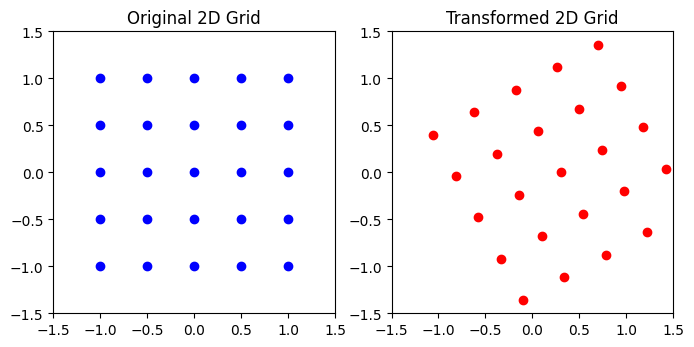

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Step 1: Define learnable parameters (angle, tx, ty)
# Initialize with some values, for example: angle = 0 (no rotation), tx = 0, ty = 0
angle = nn.Parameter(torch.tensor(0.5))  # Learnable angle (in radians)
tx = nn.Parameter(torch.tensor(0.3))     # Learnable translation along x-axis
ty = nn.Parameter(torch.tensor(0.0))     # Learnable translation along y-axis

# Step 2: Create a 2D grid of coordinates (e.g., a grid from -1 to 1 in both x and y directions)
grid_x, grid_y = torch.meshgrid(torch.linspace(-1, 1, steps=5), torch.linspace(-1, 1, steps=5))
print(grid_x)
print(grid_y)
grid = torch.stack([grid_x.flatten(), grid_y.flatten()], dim=1)  # Shape (num_points, 2)

# Step 3: Define the affine transformation matrix using the learnable parameters
theta = torch.tensor([
    [torch.cos(angle), -torch.sin(angle), tx],  # Rotation and translation
    [torch.sin(angle), torch.cos(angle), ty]    # Rotation and translation
])  # Add batch dimension (1, 2, 3)

# Step 4: Add an extra column of 1s to represent the homogeneous coordinates
ones = torch.ones(grid.shape[0], 1)
grid_homogeneous = torch.cat([grid, ones], dim=1)  # Shape (num_points, 3)

print(grid_homogeneous.shape)
print(theta.shape)

# Step 5: Apply the affine transformation
transformed_grid = grid_homogeneous @ theta.T  # Matrix multiplication
print(transformed_grid.shape)

# Extract the transformed x, y coordinates
transformed_x = transformed_grid[:, 0]
transformed_y = transformed_grid[:, 1]

# Step 6: Plot the original and transformed grids
plt.figure(figsize=(8, 4))

# Original grid
plt.subplot(1, 2, 1)
plt.scatter(grid[:, 0].numpy(), grid[:, 1].numpy(), color='blue')
plt.title("Original 2D Grid")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().set_aspect('equal', adjustable='box')

# Transformed grid
plt.subplot(1, 2, 2)
plt.scatter(transformed_x.numpy(), transformed_y.numpy(), color='red')
plt.title("Transformed 2D Grid")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

